In [2]:
# Imports and utility functions
using JLD2, Plots, StatsBase, ConvexHullPricing
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer
RANGE = 0:1:900
function refine_it(valuevec, timevec)
    new_values = Float64[]
    for t in RANGE
        push!(new_values, valuevec[searchsortedfirst(timevec, t)])
    end
    return new_values
end
function get_relative_error(array, idx)
    precision = Float64[]
    for elt in array
        push!(precision, 100 * ((elt)/abs(Opts[idx])))
    end
    return precision
end
function get_relative_error_CA(array, idx)
    precision = Float64[]
    for elt in array
        push!(precision, 100 * (elt/abs(OptsCA[idx])))
    end
    return precision
end
function make_it_monotone(array)
    new_array = Float64[]
    push!(new_array, array[1])
    for elt in array[2:end]
        if elt < minimum(new_array)
            push!(new_array, elt)
        else
            push!(new_array, minimum(new_array))
        end
    end
    return new_array
end

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-02


make_it_monotone (generic function with 1 method)

In [3]:
BEinstances = []
for file in readdir("..//data//belgian"; join=true)
    push!(BEinstances, UT.load_data(file))
end

In [4]:
idx = 1 # Autumn WD
instance = BEinstances[idx]
X0 = UT.LP_Relaxation(instance)
FS = maximum(load_object("december//UltraOptimalRunsBE.jld2")[idx][3])
N_MIN = 10
τ = N_MIN * 60

600

In [12]:
# Comparison of strategies for subgradient-based methods
α = 25.
η = 0.01
_, _, fsl, tsl = OPT.tnSubgradientMethod(instance, X0, τ, α)
_, _, fss, tss = OPT.tSubgradientMethod(instance, X0, τ, η)

([47.93817020189401, 47.44535888501149, 47.44313642548505, 45.84891182012159, 45.368528717369536, 45.390242610949166, 45.40696257704447, 45.41724802812874, 44.965538360327166, 42.33715509528132  …  45.74351948731211, 39.24517198966683, 47.86455126329848, 50.83049338626383, 47.8886399588895, 45.686865360757174, 51.061393382020775, 47.01810793506963, 47.00168689157798, 45.23821056968829], [[48.0159, 47.5826818275154, 47.431412120693594, 47.33785608676959, 45.27678260425666, 45.299383233061526, 45.320751613406806, 45.34095493086859, 45.36005670788052, 43.11914329211949  …  48.35177508412132, 44.2396, 47.44628270034859, 50.739086130560636, 47.97323533682523, 46.719548704696315, 52.32599615384617, 47.78080384615384, 47.19335817375387, 45.350891744787255], [47.906166500000005, 47.17151502751537, 45.47181202069362, 46.95532268676958, 44.307315904256676, 44.09298323306152, 46.05995161340681, 45.46775493086857, 44.81445670788052, 41.8856432921195  …  45.0305750841213, 39.89236670000001, 44.2293

In [ ]:
length(fss) + 1

In [20]:
plot(tsl[2:end], (FS .- fsl) ./ abs(FS), label = "Step length variant | α = 25")
plot!(tss[2:end], (FS .- fss) ./ abs(FS), label = "Step size variant | η = 0.01")
plot!(xlabel = "Time in seconds", ylabel = "Relative function error", title = "Step length or Step size - Be Autumn WD")
savefig("sl_vs_ss_autumnwd.pdf")

"/home/sofiane/Documents/ConvexHullPricing.jl/results/sl_vs_ss_autumnwd.pdf"

In [21]:
fr1, tr1 = fsl, tsl
_, _, fr2, tr2 = OPT.tnRSG(instance, X0, τ, 2, α)
_, _, fr3, tr3 = OPT.tnRSG(instance, X0, τ, 3, α)
_, _, fr5, tr5 = OPT.tnRSG(instance, X0, τ, 5, α)

┌ Info: [RSG: Iteration 1]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 2]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 1]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 2]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 3]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 1]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 2]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 3]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 4]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


┌ Info: [RSG: Iteration 5]
└ @ ConvexHullPricing.Optimizer /home/sofiane/Documents/ConvexHullPricing.jl/src/optimizers/dual_methods/SubgradientMethod.jl:157


([47.881410471784065, 47.461899879285774, 47.43800282437439, 46.52341752931151, 45.405680447109106, 45.40819456224025, 44.89467476806689, 45.87869207909958, 44.84526036430784, 42.11120146326015  …  45.758401295903454, 37.889669277358635, 48.031968431863206, 51.116016048725754, 47.6967222349385, 45.68111877927028, 50.292762693030845, 47.04191830384366, 47.13738307816518, 45.55102679415784], [[48.0159, 47.5826818275154, 47.431412120693594, 47.33785608676959, 45.27678260425666, 45.299383233061526, 45.320751613406806, 45.34095493086859, 45.36005670788052, 43.11914329211949  …  48.35177508412132, 44.2396, 47.44628270034859, 50.739086130560636, 47.97323533682523, 46.719548704696315, 52.32599615384617, 47.78080384615384, 47.19335817375387, 45.350891744787255], [48.0159, 47.5826818275154, 47.431412120693594, 47.33785608676959, 45.27678260425666, 45.299383233061526, 45.320751613406806, 45.34095493086859, 45.36005670788052, 43.11914329211949  …  48.35177508412132, 44.2396, 47.44628270034859, 50.

In [26]:
FR1 = make_it_monotone((FS .- fr1) ./ abs(FS))
FR2 = make_it_monotone((FS .- fr2) ./ abs(FS))
FR3 = make_it_monotone((FS .- fr3) ./ abs(FS))
FR5 = make_it_monotone((FS .- fr5) ./ abs(FS))

plot(tr1[2:end], (FS .- fr1) ./ abs(FS), label = "No Restarts | α = 25")
plot!(tr2[2:end], (FS .- fr2) ./ abs(FS), label = "1 Restart | α = 25")
plot!(tr3[2:end], (FS .- fr3) ./ abs(FS), label = "2 Restarts | α = 25")
plot!(tr5[2:end], (FS .- fr5) ./ abs(FS), label = "4 Restarts | α = 25")
plot!(xlabel = "Time in seconds", ylabel = "Relative function error", title = "Number of restarts - Be Autumn WD")
savefig("1_restart_max.pdf")

"/home/sofiane/Documents/ConvexHullPricing.jl/results/1_restart_max.pdf"

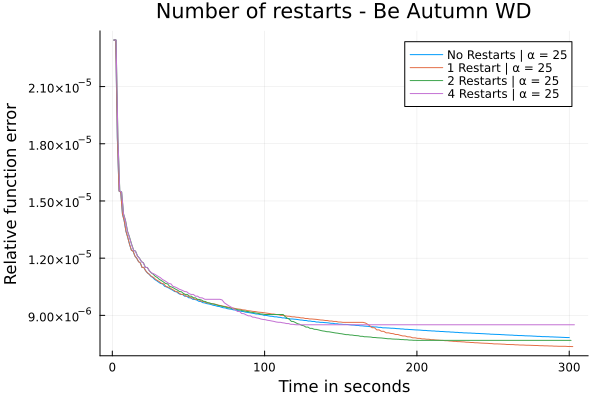

In [25]:
plot(tr1[2:end], FR1, label = "No Restarts | α = 25")
plot!(tr2[2:end], FR2, label = "1 Restart | α = 25")
plot!(tr3[2:end], FR3, label = "2 Restarts | α = 25")
plot!(tr5[2:end], FR5, label = "4 Restarts | α = 25")
plot!(xlabel = "Time in seconds", ylabel = "Relative function error", title = "Number of restarts - Be Autumn WD")


In [55]:
ς = 1e-6
α = 1e-3
Β = UT.GetShift(instance)

xbsGM, itsGM, fsGM, tsGM = OPT.tGM(instance, X0, τ, α, ς, Β)

([47.561454389999994, 47.43012001751523, 47.27900805658788, 45.54883582266351, 45.42727601015073, 45.34929025895533, 45.238284030084046, 45.53298742754559, 45.25571728183239, 41.81022386607128  …  45.93457018834598, 37.46150702974249, 47.86785592023497, 51.56852890304754, 47.13538396015116, 45.542887920312864, 49.69374207080012, 47.203090597677196, 47.35002824586403, 45.93776910261231], [[48.0159, 47.5826818275154, 47.431412120693594, 47.33785608676959, 45.27678260425666, 45.299383233061526, 45.320751613406806, 45.34095493086859, 45.36005670788052, 43.11914329211949  …  48.35177508412132, 44.2396, 47.44628270034859, 50.739086130560636, 47.97323533682523, 46.719548704696315, 52.32599615384617, 47.78080384615384, 47.19335817375387, 45.350891744787255], [47.70207998, 47.4131684775154, 47.195755440693596, 46.96635607676959, 45.16528926425666, 45.16419656306152, 45.1278716134068, 45.35363493086859, 45.31564670788052, 43.00594329211949  …  48.01965508412132, 43.804876670000006, 47.1245927003

In [60]:
xbGM, itGM, fGM, tGM = OPT.tGradientMethod(instance, X0, τ, α, ς)

([47.94774075000003, 47.55843310751521, 47.52190950809855, 45.63001400417411, 45.384547571661386, 45.54041519046585, 45.525222187932926, 45.37719947458708, 45.32039533651031, 41.78873192074919  …  45.82756682079971, 37.156822875362685, 48.28175504571111, 51.75856129592363, 47.08237193342443, 45.57129641414601, 49.698313672140245, 47.120671356398006, 47.52520001490522, 46.013227721619266], [[48.0159, 47.5826818275154, 47.431412120693594, 47.33785608676959, 45.27678260425666, 45.299383233061526, 45.320751613406806, 45.34095493086859, 45.36005670788052, 43.11914329211949  …  48.35177508412132, 44.2396, 47.44628270034859, 50.739086130560636, 47.97323533682523, 46.719548704696315, 52.32599615384617, 47.78080384615384, 47.19335817375387, 45.350891744787255], [48.049019990000005, 47.5856584875154, 47.53454545069359, 47.32869608676959, 45.46118260425666, 45.44554323306153, 45.39467161340681, 45.35363493086859, 45.31564670788052, 43.00594329211949  …  48.02091144475864, 43.80613303063732, 47.12

In [61]:
FGMval = Float64[]
for price in itGM
    push!(FGMval, UT.exact_oracle(instance, price)[1])
end

In [56]:
FSGMval = Float64[]
for price in itsGM
    push!(FSGMval, UT.exact_oracle(instance, price)[1])
end
FGMval = Float64[]
for price in itGM
    push!(FGMval, UT.exact_oracle(instance, price)[1])
end

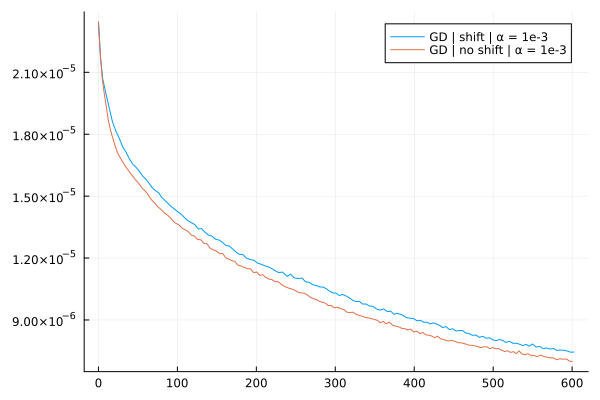

In [62]:
plot(tsGM, (FS .- FSGMval) ./ abs(FS), label = "GD | shift | α = 1e-3")
plot!(tGM, (FS .- FGMval) ./ abs(FS), label = "GD | no shift | α = 1e-3")
#plot!(title = "Advantage of shifting the smoothing with X0", xlabel = "Time in seconds", ylabel = "Relative function error")
#savefig("ShiftAdvantageTrace.pdf")

In [14]:
xax, yax = load_object("GM_tuning_on_Autumn_WD")
fxax, fyax = load_object("FGM_tuning_on_Autumn_WD")

2-element Vector{Vector{Float64}}:
 [0.0001, 0.0001259396931727271, 0.0001586080631644065, 0.00019975050809645876, 0.0002515651770076436, 0.0003168204120528542, 0.00039900265484793437, 0.0005025027192665239, 0.0006328503828288705, 0.0007970098303771083, 0.0010037517349334032, 0.0012641218551910532, 0.0015920311857569984, 0.0020049991905564937, 0.002525089828702509, 0.003180090382603681, 0.00400499607046648, 0.005043879762725264, 0.006352246697177471, 0.008]
 [30418.990470409393, 28267.039771556854, 25037.95406150818, 22855.295196533203, 20215.430500984192, 17950.525022506714, 15849.246724128723, 13364.6118350029, 13578.250022411346, 12447.497118473053, 10069.02381658554, 7085.747579574585, 6103.829862117767, 5738.15855550766, 6175.9409012794495, 8079.402481079102, 8487.17382478714, 17657.134294986725, 35582.3195142746, 38941.57760095596]

In [18]:
@show xax[argmin(yax)]

xax[argmin(yax)] = 0.003556480306223128


0.003556480306223128

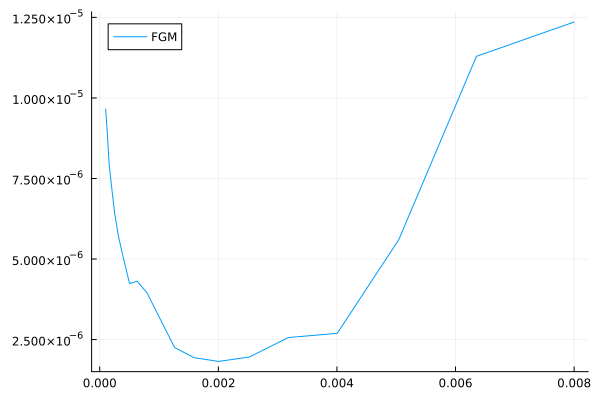

In [16]:
# plot(xax, yax ./ abs(FS), xlims = (0, 0.005), label = "GM")
plot(fxax, fyax ./ abs(FS), label="FGM")
